In [5]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Get and store the data
#store the data
df = pd.read_csv('BIT-USD.csv')
df=df.set_index(pd.DatetimeIndex(df['Date']).values)


In [7]:
#show the data
df
#Data cleaning
df.dropna(inplace=True)


In [8]:
#create a variable for prediction 'n' days out into the future
projection = 15
#create a new column called prediction
df['Prediction'] = df[['Price']].shift(-projection)
#Show the data set
df
#creating the independent data set "X"
X = np.array(df[['Price']])
#remove the last 15 rows
X = X[:-projection]
print(X)


[[16618.4]
 [16537.4]
 [16607.2]
 [16636.4]
 [16546.2]
 [16706.1]
 [16918.1]
 [16831.8]
 [16837.2]
 [16779.1]
 [16820.6]
 [16831.8]
 [16902.8]
 [16441.3]
 [16741.1]
 [16777.1]
 [16629.6]
 [17356.1]
 [17796.4]
 [17778.6]
 [17210.4]
 [17093.3]
 [17127.2]
 [17125.7]
 [17225.7]
 [16835.2]
 [17089.3]
 [16966.5]
 [17112.6]
 [16884.5]
 [17093.6]
 [16972. ]
 [17163.9]
 [16440.4]
 [16211.7]
 [16425.6]
 [16456.5]
 [16512.3]
 [16601.2]
 [16623.9]
 [16212.9]
 [15776.2]
 [16286.7]
 [16699.2]
 [16638.3]
 [16691.2]
 [16540.5]
 [16895.1]
 [16613.7]
 [16324.5]
 [16795.2]
 [17049.9]
 [17589.1]
 [15886.9]
 [18527.4]
 [20589. ]
 [20916.3]
 [21301.6]
 [21145.9]
 [20206.4]
 [20154.4]
 [20483.5]
 [20496.3]
 [20626.3]
 [20809.8]
 [20594.4]
 [20292.9]
 [20769.5]
 [20082.7]
 [19331.5]
 [19571.2]
 [19204.8]
 [19162.6]
 [19042.9]
 [19123.9]
 [19328.2]
 [19548.2]
 [19261.9]
 [19068.7]
 [19181.8]
 [19379.8]
 [19154.8]
 [19059.1]
 [19134.6]
 [19441. ]
 [19415. ]
 [19531.3]
 [19956.7]
 [20157.5]
 [20340.2]
 [19628.3]

In [9]:
#Creating dependent data  set "Y"
Y = df['Prediction'].values
Y = Y[:-projection]
print(Y)


[16777.1 16629.6 17356.1 17796.4 17778.6 17210.4 17093.3 17127.2 17125.7
 17225.7 16835.2 17089.3 16966.5 17112.6 16884.5 17093.6 16972.  17163.9
 16440.4 16211.7 16425.6 16456.5 16512.3 16601.2 16623.9 16212.9 15776.2
 16286.7 16699.2 16638.3 16691.2 16540.5 16895.1 16613.7 16324.5 16795.2
 17049.9 17589.1 15886.9 18527.4 20589.  20916.3 21301.6 21145.9 20206.4
 20154.4 20483.5 20496.3 20626.3 20809.8 20594.4 20292.9 20769.5 20082.7
 19331.5 19571.2 19204.8 19162.6 19042.9 19123.9 19328.2 19548.2 19261.9
 19068.7 19181.8 19379.8 19154.8 19059.1 19134.6 19441.  19415.  19531.3
 19956.7 20157.5 20340.2 19628.3 19052.2 19311.9 19423.  19593.  19411.
 19081.  19225.7 18803.2 18925.2 19293.5 19404.  18489.  18872.4 19538.9
 19418.8 20113.5 19802.4 19701.7 20222.5 20175.5 22395.3 21834.9 21650.4
 21365.2 19317.4 19281.5 18786.4 19793.1 19999.9 19831.4 19952.7 20126.1
 20043.9 19792.6 20295.8 19550.2 20033.9 20249.9 21565.4 21365.2 21517.2
 21416.3 21517.2 21138.9 20831.3 23203.6 23338.  238

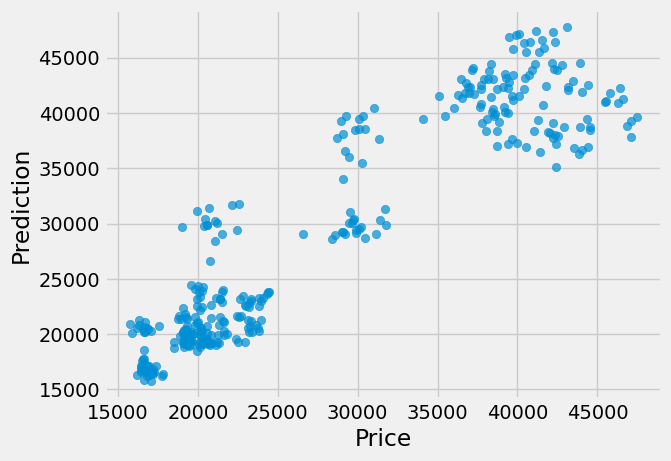

In [10]:
#splitting data into 85% training and 15% testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .15)
plt.scatter(X,Y,alpha=.7)
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.show()

In [11]:
from sklearn.svm import SVR
svr_rbfE = SVR(kernel='rbf', C=1e3, gamma=0.00001)
# Train the SVM model
svr_rbfE.fit(X_train, Y_train)


SVR(C=1000.0, gamma=1e-05)

In [12]:
# Calculate the accuracy of the model on the test data
svr_rbfE_confidence = svr_rbfE.score(X_test, Y_test)
print('svrE accuracy:', svr_rbfE_confidence)

svrE accuracy: 0.6993041529144635


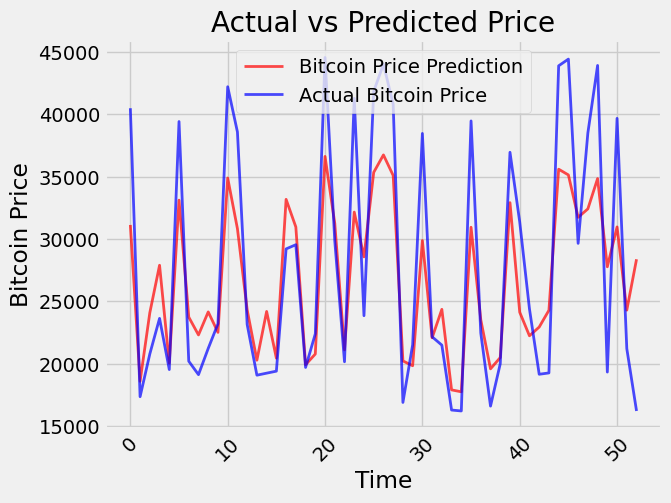

In [13]:
# Make predictions on the test data using the trained model
svm_predictionE = svr_rbfE.predict(X_test)

# Plot the predicted prices (svm_predictionE) against the actual prices (Y_test)
plt.plot(svm_predictionE, color='red', lw=2, alpha=0.7, label='Bitcoin Price Prediction')
plt.plot(Y_test, color='blue', lw=2, alpha=0.7, label='Actual Bitcoin Price')
plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
